# Analysis of AI Trust model
> Teesside workshop model, March 2024

In [1]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

from prototype_phd.conditions import *
from prototype_phd.data_utils import *
from prototype_phd.methods import *
from prototype_phd.models import *
from prototype_phd.model_utils import *
from prototype_phd.payoffs import *
from prototype_phd.plot_utils import *
from prototype_phd.types import *
from prototype_phd.utils import *

import numpy as np

In [2]:
Z = {"S3": 100, "S2": 100, "S1": 100}
β = 1
sector_strategies = {"S3": [6, 7],
                     "S2": [3, 4],
                     "S1": [1, 2], }
allowed_sectors = {"P3": ["S3"],
                   "P2": ["S2"],
                   "P1": ["S1"], }
models = build_ai_trust()
models = {**models,
          "dispatch-type": 'multiple-populations',
          "payoffs_key": "ai-trust-v1",
        #   "game_welfare_rule": "ai-trust-v1",
          "β": β,
          "Z": Z,
          "allowed_sectors": allowed_sectors,
          "sector_strategies": sector_strategies,
          }

In [3]:
models = {**models,
          **build_ai_trust(Eps={"start": -1, "stop": 1, "step": 0.1},
                           cR=0.5),
          }
# strategy_set:list[str]=["T-C-C", "T-C-D", "T-D-C", "T-D-D",
#                         "N-C-C", "N-C-D", "N-D-C", "N-D-D",
#                         "CT-C-C", "CT-C-D", "CT-D-C", "CT-D-D"]
# models["strategy_set"] = strategy_set
# strategy_set:list[str]=["T-C-C", "T-C-D", "T-D-C", "T-D-D",
#                         "N-C-C", "N-C-D", "N-D-C", "N-D-D"]
# models["strategy_set"] = strategy_set
strategy_set:list[str]=["N-C-C", "N-C-D", "N-D-C", "N-D-D",
                        "CT-C-C", "CT-C-D", "CT-D-C", "CT-D-D"]
models["strategy_set"] = strategy_set
# models['β'] = {"S1": models['β'], "S2": models['β'],  "S3": models['β']}
# Check the size of the created arrays using:
{k: models[k].shape for k,v in models.items() if isinstance(v, np.ndarray)}

{'Eps': (800,),
 'b_fo': (800,),
 'bU': (800,),
 'bP': (800,),
 'cP': (800,),
 'u': (800,),
 'cR': (800,),
 'bR': (800,),
 'v': (800,),
 'β': (800,)}

In [4]:
results = thread_macro(models,
                       create_profiles,
                       apply_profile_filters,
                       build_payoffs,
                       build_transition_matrix,
                       find_ergodic_distribution,
                       )

In [5]:
# Add workaround for better labels for frquency columns
results["recurrent_states"] = results["strategy_set"]

In [6]:
df = thread_macro(results,
                  results_to_dataframe_egt,
                  )

In [7]:
{k: results[k].shape for k,v in results.items() if isinstance(v, np.ndarray)}

{'Eps': (800,),
 'b_fo': (800,),
 'bU': (800,),
 'bP': (800,),
 'cP': (800,),
 'u': (800,),
 'cR': (800,),
 'bR': (800,),
 'v': (800,),
 'β': (800,),
 'transition_matrix': (800, 8, 8),
 'ergodic': (800, 8)}

In [8]:
result_sums = np.sum(results['ergodic'], axis=-1)
# Test that all entries in result_sums are close to 1
assert np.allclose(result_sums, 1, atol=1e-10)

In [9]:
df

,Eps,b_fo,bU,bP,cP,u,cR,bR,v,β,N-C-C_frequency,N-C-D_frequency,N-D-C_frequency,N-D-D_frequency,CT-C-C_frequency,CT-C-D_frequency,CT-D-C_frequency,CT-D-D_frequency
0,-1.0,0.0,4,4,0.5,1.5,0.5,4,0.5,0.1,2.779715e-07,9.801228e-06,3.321693e-04,1.626393e-03,0.997923,3.358249e-07,0.000048,6.040310e-05
1,-1.0,0.5,4,4,0.5,1.5,0.5,4,0.5,0.1,2.780450e-07,9.762103e-06,3.322989e-04,1.619934e-03,0.997936,3.275055e-07,0.000048,5.305058e-05
2,-1.0,1.0,4,4,0.5,1.5,0.5,4,0.5,0.1,2.781001e-07,9.732808e-06,3.323960e-04,1.615098e-03,0.997947,3.212764e-07,0.000048,4.754541e-05
3,-1.0,1.5,4,4,0.5,1.5,0.5,4,0.5,0.1,2.781429e-07,9.710077e-06,3.324713e-04,1.611346e-03,0.997954,3.164431e-07,0.000048,4.327381e-05
4,-1.0,2.0,4,4,0.5,1.5,0.5,4,0.5,0.1,2.781770e-07,9.691947e-06,3.325314e-04,1.608353e-03,0.997961,3.125880e-07,0.000048,3.986676e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.9,17.5,4,4,0.5,1.5,0.5,4,0.5,0.1,1.945113e-15,3.996766e-15,2.785119e-16,1.378068e-14,0.999950,6.783945e-16,0.000050,1.244939e-16
796,0.9,18.0,4,4,0.5,1.5,0.5,4,0.5,0.1,3.441605e-15,1.321319e-15,1.352827e-16,2.466479e-14,0.999950,6.974474e-16,0.000050,7.608321e-17
797,0.9,18.5,4,4,0.5,1.5,0.5,4,0.5,0.1,1.858868e-15,1.704858e-15,1.297240e-16,1.416410e-14,0.999950,6.526666e-16,0.000050,7.262808e-16
798,0.9,19.0,4,4,0.5,1.5,0.5,4,0.5,0.1,2.454003e-16,2.837806e-15,5.402485e-16,4.904661e-14,0.999950,8.024274e-16,0.000050,9.684142e-16


In [10]:
# Workaround to ensure we can easily slice the dataframe by the Eps column
df["Eps"] = np.round(df["Eps"], 2)

Note: The results below were run with potentially different parameter settings than you currently see above.

## Without Conditional Trust

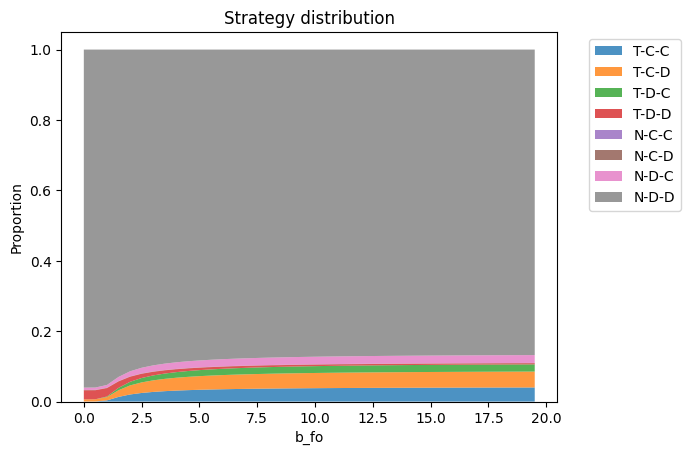

In [73]:
plot_strategy_distribution(df[df["Eps"] == -0.1],
                           results['strategy_set'],
                           x="b_fo",
                           x_label="b_fo",
                           thresholds=None,
                           )

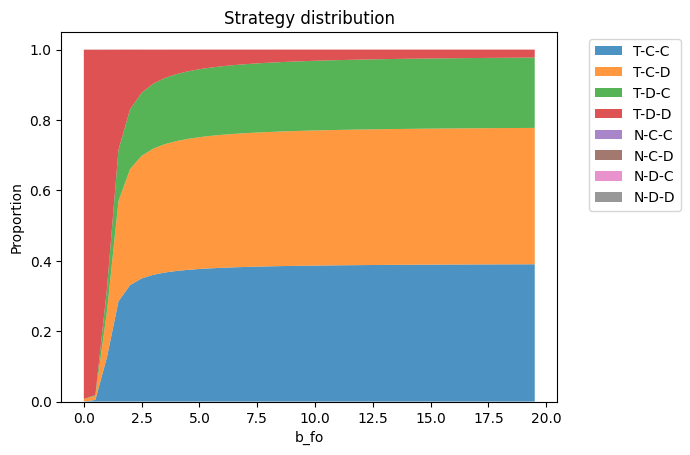

In [74]:
plot_strategy_distribution(df[df["Eps"] == 0.2],
                           results['strategy_set'],
                           x="b_fo",
                           x_label="b_fo",
                           thresholds=None,
                           )

## With conditional trust

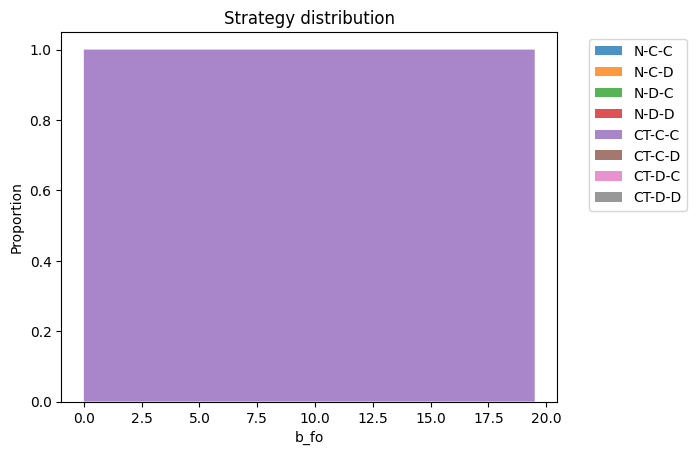

In [84]:
plot_strategy_distribution(df[df["Eps"] == -0.1],
                           results['strategy_set'],
                           x="b_fo",
                           x_label="b_fo",
                           thresholds=None,
                           )

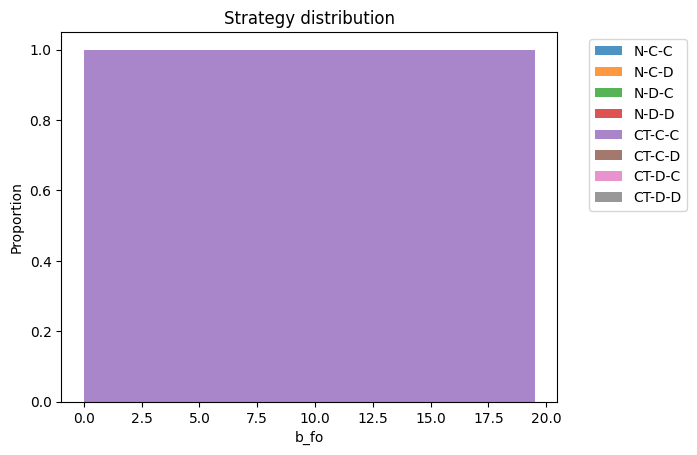

In [85]:
plot_strategy_distribution(df[df["Eps"] == 0.2],
                           results['strategy_set'],
                           x="b_fo",
                           x_label="b_fo",
                           thresholds=None,
                           )

## When it is possible to choose between trust and conditional trust

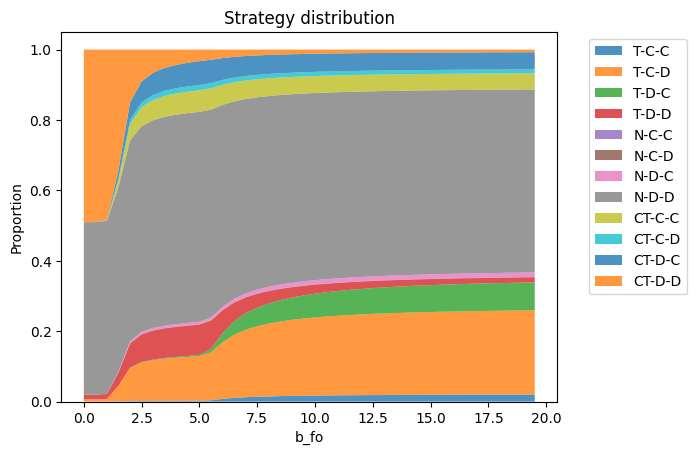

In [29]:
plot_strategy_distribution(df[df["Eps"] == -0.1],
                           results['strategy_set'],
                           x="b_fo",
                           x_label="b_fo",
                           thresholds=None,
                           )

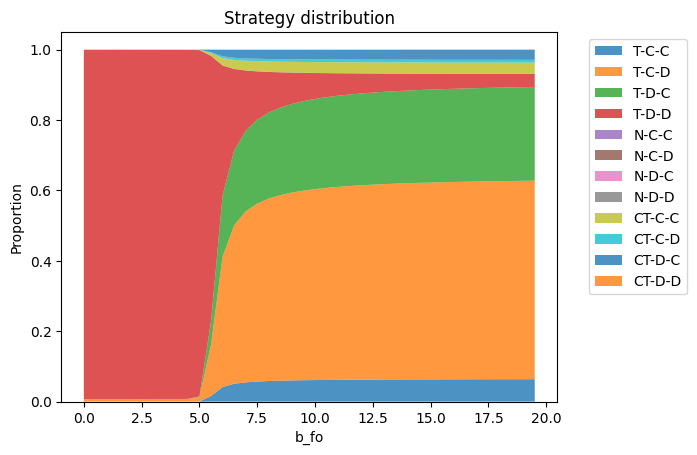

In [30]:
plot_strategy_distribution(df[df["Eps"] == 0.2],
                           results['strategy_set'],
                           x="b_fo",
                           x_label="b_fo",
                           thresholds=None,
                           )

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Bounty for regulators, b_fo', ylabel='Externality impact, Eps'>,
 <matplotlib.image.AxesImage at 0x72203542f430>)

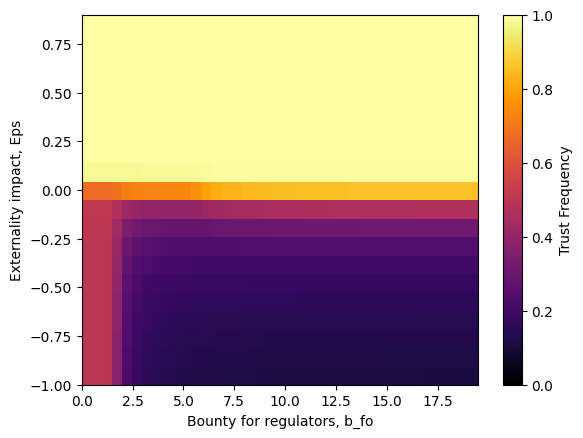

In [31]:
df['Trust_frequency'] = (df['CT-D-D_frequency']
                      + df['CT-D-C_frequency']
                      + df['CT-C-D_frequency']
                      + df['CT-C-C_frequency']
                      + df['T-D-D_frequency']
                      + df['T-D-C_frequency']
                      + df['T-C-D_frequency']
                      + df['T-C-C_frequency'])

table = df.pivot_table(index='Eps', columns='b_fo', values='Trust_frequency')
plot_heatmap(table,
             xlabel='Bounty for regulators, b_fo',
             ylabel='Externality impact, Eps',
             zlabel='Trust Frequency',
             cmap='inferno',
             )